<a href="https://colab.research.google.com/github/tecatanka/SWB_Mod_Opt/blob/main/SWB_NN_Reg_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
#!pip install tensorflow
#!pip install seaborn
#!pip install pandas
#!pip install numpy
#!pip install keras
#!pip install keras_tuner

In [91]:
# Import packages
#from __future__ import absolute_import, division, print_function
#import pathlib

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [93]:
from google.colab import files
uploaded=files.upload()

Saving ugtests.csv to ugtests (1).csv


You are working as an analyst for the biology department of a large academic institution which offers a four-year undergraduate degree program. The academic leaders of the department are interested in understanding how student performance in the final-year examination of the degree program relates to performance in the prior three years.

To help with this, you have been provided with data for 975 individuals graduating in the past three years, and you have been asked to create a model to explain each individual’s final examination score based on their examination scores for the first three years of their program. The Year 1 examination scores are awarded on a scale of 0–100, Years 2 and 3 on a scale of 0–200, and the Final year is awarded on a scale of 0–300.

We will load the ugtests data set into our session and take a brief look at it.

https://peopleanalytics-regression-book.org/linear-reg-ols.html


In [94]:
# Data acquisition

raw_dataset = pd.read_csv("ugtests.csv")


In [95]:
# see data
dataset = raw_dataset.copy()
dataset.tail() # looking last rows


,Yr1,Yr2,Yr3,Final
970,78,68,166,176
971,44,61,116,155
972,80,97,121,148
973,37,79,120,178
974,58,135,125,172


In [96]:
# Number of rows in data set
num_rows=len(dataset)
num_rows

975

In [97]:
# Number of columns
num_cols=len(dataset.columns)
num_cols

4

In [98]:
# Types of columns
types_cols=dataset.dtypes
types_cols

Yr1      int64
Yr2      int64
Yr3      int64
Final    int64
dtype: object

In [99]:
# Clean data
dataset.isna().sum() #add cells that have no data (NA)


Yr1      0
Yr2      0
Yr3      0
Final    0
dtype: int64

In [100]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Yr1,975.0,52.145641,14.924083,3.0,42.0,53.0,62.0,99.0
Yr2,975.0,92.398974,30.038473,6.0,73.0,94.0,112.0,188.0
Yr3,975.0,105.121026,33.507052,8.0,81.0,105.0,130.0,198.0
Final,975.0,148.962051,44.339663,8.0,118.0,147.0,175.0,295.0


In [101]:
# Create training and test sets

y=dataset.Final
x=dataset.drop('Final', axis=1)
x.head()

,Yr1,Yr2,Yr3
0,27,50,52
1,70,104,126
2,27,36,148
3,26,75,115
4,46,77,75


In [102]:
y.head()

0     93
1    207
2    175
3    125
4    114
Name: Final, dtype: int64

In [103]:
# Split train and test sets
train_features, test_features, train_label, test_label=train_test_split(x,y,test_size=0.2, random_state=42)


In [104]:
#number of rows train set
train_rows=len(train_features)
train_rows

780

In [105]:
#number of rows test set
test_rows=len(test_features)
test_rows

195

In [106]:
#number of rows train set
y_train_rows=len(train_label)
y_train_rows

780

In [107]:
#number of rows train set
y_test_rows=len(test_label)
y_test_rows

195

In [108]:
# Ranges of values in feature columns
train_features.describe().transpose()[['mean', 'std']]

,mean,std
Yr1,52.105128,14.938100
Yr2,93.406410,29.814578
Yr3,104.551282,33.292514


In [109]:
# Normalize variables via normalization layer in Keras:

#Create normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1)

#Fit state of preprocessing layer to the data
normalizer.adapt(np.array(train_features))

print(normalizer.mean.numpy())

[[ 52.105125  93.40641  104.551285]]


In [110]:
# Example normalizing the first row of features
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())


First example: [[ 49 129 109]]

Normalized: [[-0.21  1.19  0.13]]


In [111]:
train_features.head(1)

,Yr1,Yr2,Yr3
969,49,129,109


In [112]:
# Linear regression with multiple inputs (X's)
# y=mx+b and m is a matrix, b is a vector

#Creating a two-step sequential model with first layer being normalizer
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])


In [113]:
# Configure model wit Keras
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [114]:
%%time
# Model fit for 100 epochs  (complete pass of the training dataset through the algorithm)

history = linear_model.fit(
    train_features,
    train_label,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)



CPU times: user 9.26 s, sys: 609 ms, total: 9.87 s
Wall time: 9.09 s


In [115]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)


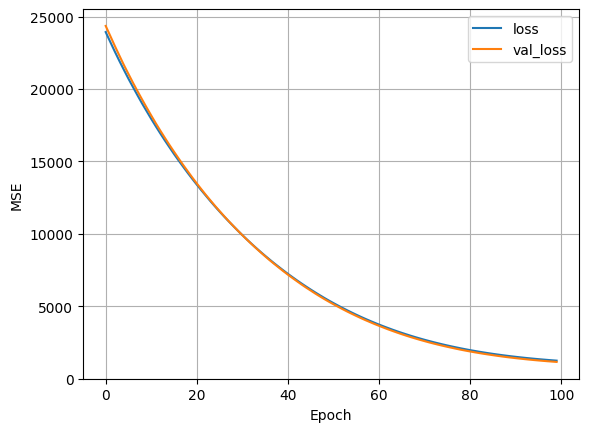

In [116]:
plot_loss(history)


In [117]:
# Collect result for test set
test_results={}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_label, verbose=0)


7/7 [==============================] - 0s 2ms/step


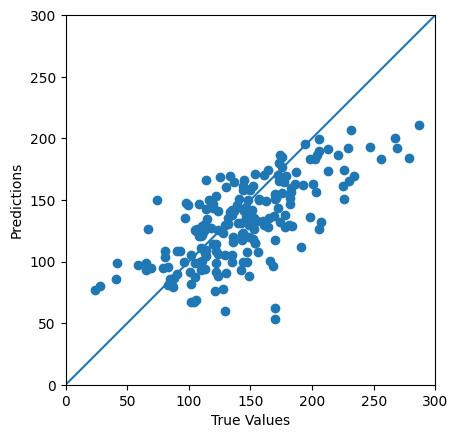

In [118]:
test_predictions = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_label, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


### Regression using a DNN: Single and and Multiple inputs

Repeating the previous process using all the inputs. The model's performance slightly improves on the validation dataset.


Neural network: 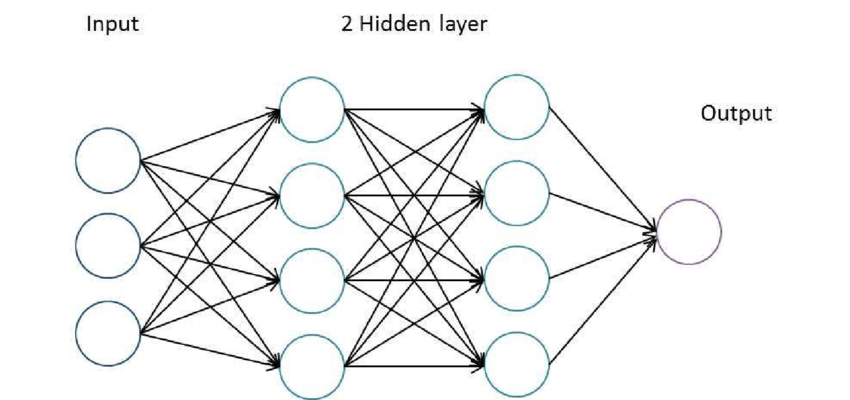

In [119]:
# Creating build and compile function with 2 inner layers
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


The first parameter, norm, is a normalization layer. This layer normalizes the input data, which can help to improve the performance of the model.

The next three parameters are all Dense layers. These layers are fully connected layers, which means that each neuron in a layer is connected to every neuron in the next layer. The 64 parameter specifies the number of neurons in each Dense layer.

The final parameter, 1, specifies the number of neurons in the output layer. The output layer is responsible for generating the predictions of the model.

The activation function for each Dense layer is relu. This function is a non-linear function that helps the model to learn more complex relationships between the input and output data.

The code provided creates a simple neural network with three hidden layers. The number of neurons in each hidden layer can be changed to experiment with different model architectures. The activation function can also be changed to try different non-linearities.

In [120]:
# Regression using a DNN and a single input
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense_17 (Dense)            (None, 64)                256       
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,488
Trainable params: 4,481
Non-trainable params: 7
_________________________________________________________________


In [121]:
%%time
# Train the model

history = dnn_model.fit(
    train_features,
    train_label,
    validation_split=0.2,
    verbose=0, epochs=100)


CPU times: user 10.9 s, sys: 699 ms, total: 11.6 s
Wall time: 10.4 s


CPU times: user 22.2 ms, sys: 3.02 ms, total: 25.2 ms
Wall time: 25.5 ms


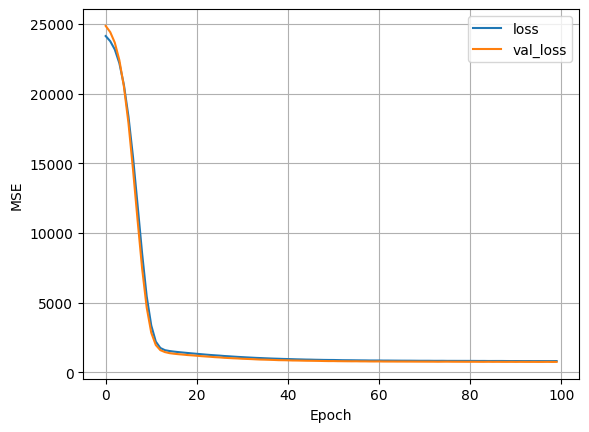

In [122]:
%%time
plot_loss(history)


7/7 [==============================] - 0s 3ms/step


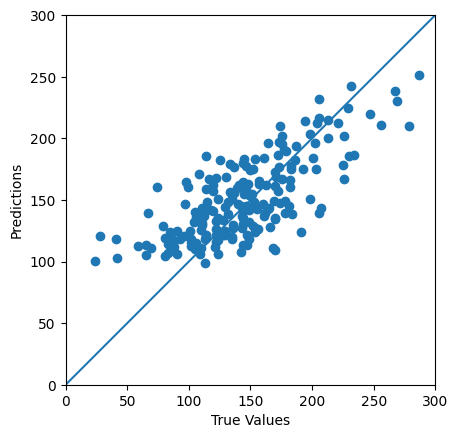

In [123]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_label, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)



In [124]:
# Collect results of test for later
test_results['dnn_model'] = dnn_model.evaluate(
    test_features, test_label,
    verbose=0)


## Performance

In [125]:
pd.DataFrame(test_results, index=['MSE']).T


,MSE
linear_model,1271.927368
dnn_model,1001.845093


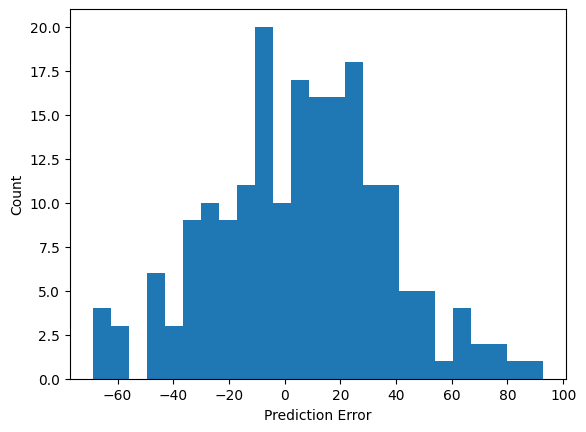

In [126]:
# Error distribution
error = test_predictions - test_label
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')


### Hyperparameter Optimization

The Keras Tuner is a library that helps you pick the optimal set of hyperparameters for your TensorFlow program. The process of selecting the right set of hyperparameters for your machine learning (ML) application is called hyperparameter tuning or hypertuning.

Hyperparameters are the variables that govern the training process and the topology of an ML model. These variables remain constant over the training process and directly impact the performance of your ML program. Hyperparameters are of two types:

1. Model hyperparameters which influence model selection such as the number and width of hidden layers
2. Algorithm hyperparameters which influence the speed and quality of the learning algorithm such as the learning rate for Stochastic Gradient Descent (SGD) and the number of nearest neighbors for a k Nearest Neighbors (KNN) classifier


In [127]:
import keras_tuner as kt
from numpy.random import seed

In [128]:
#Function that return Keras model

def build_hp_model(hp):
    model = keras.Sequential([normalizer])
    model.add(keras.layers.Dense(
        hp.Choice('units',[8,16,32,64]), hp.Choice('activation',['relu', 'sigmoid', 'selu', 'elu'])))
    model.add(keras.layers.Dense(
        hp.Choice('units',[8,16,32,64]), activation='relu'))
    model.add(keras.layers.Dense(
        hp.Choice('units',[8,16,32,64]), activation='relu'))
    model.add(keras.layers.Dense(1))
    hp_learning_rate=hp.Choice('learning_rate', values=[0.001, 0.003, 0.005, 0.01, 0.2, 0.3, 0.05])
    model.compile(loss='mse', metrics=['mse'],
                  optimizer=tf.keras.optimizers.Adam(hp_learning_rate))
    return model

In [129]:
tuner_rs=kt.RandomSearch(
    build_hp_model,
    objective='val_loss',
    seed=42,
    max_trials=10,
    overwrite=True)
    #project_name="SWB_one"
    #directory='random_search')



In [130]:
%%time
# Run Random search
tuner_rs.search(train_features, train_label, epochs=50, validation_split=0.2, verbose=0)

CPU times: user 1min 24s, sys: 4.45 s, total: 1min 29s
Wall time: 1min 35s


In [131]:
%%time
#Save best hyperparameters
best_rs=tuner_rs.get_best_hyperparameters()[0]
# Build model with best parameters
hrs_model = tuner_rs.hypermodel.build(best_rs)
hrs_model.summary()
best_rs.values


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense_4 (Dense)             (None, 8)                 32        
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 192
Trainable params: 185
Non-trainable params: 7
________________________________________________________

{'units': 8, 'activation': 'elu', 'learning_rate': 0.2}

CPU times: user 12.1 s, sys: 718 ms, total: 12.8 s
Wall time: 21.2 s


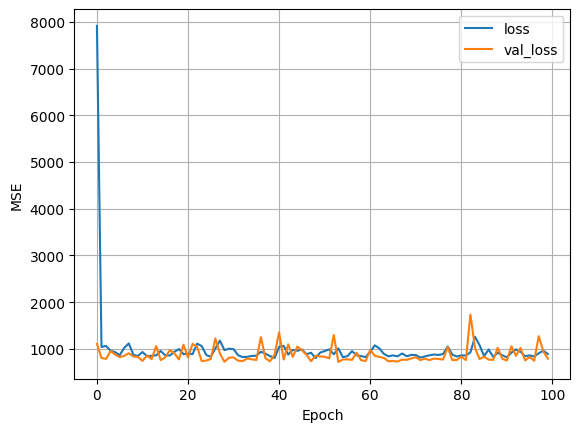

In [132]:
%%time
#hrs_model.fit(train_features, train_label, epochs=100, validation_split=0.2, verbose=0)

plot_loss(hrs_model.fit(train_features, train_label, epochs=100, validation_split=0.2, verbose=0))

7/7 [==============================] - 0s 2ms/step


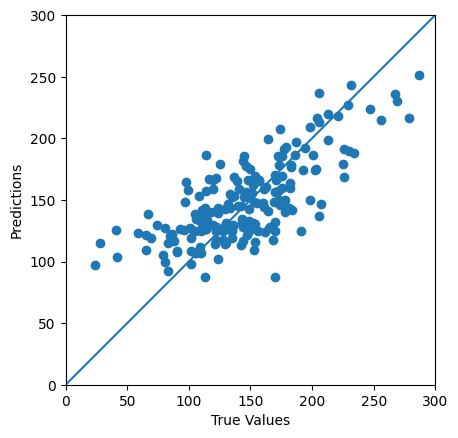

In [133]:
test_predictions = hrs_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_label, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [134]:
%%time
tuner_hBand = kt.Hyperband(
    build_hp_model,
    objective='val_loss',
    max_epochs=10,
    hyperband_iterations=2,
    overwrite=True)

CPU times: user 54 ms, sys: 3.05 ms, total: 57.1 ms
Wall time: 57 ms


In [135]:
%%time
#Perform Tuning with Hyperband
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tuner_hBand.search(train_features, train_label, epochs=100, validation_split=0.2, verbose=0,
                  callbacks=[stop_early])

CPU times: user 2min 47s, sys: 3.88 s, total: 2min 51s
Wall time: 2min 56s


In [136]:
#Save best hyperparameters
best_hBand=tuner_hBand.get_best_hyperparameters()[0]
best_hBand.values



{'units': 32,
 'activation': 'elu',
 'learning_rate': 0.05,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0042'}

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense_4 (Dense)             (None, 32)                128       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,280
Trainable params: 2,273
Non-trainable params: 7
____________________________________________________

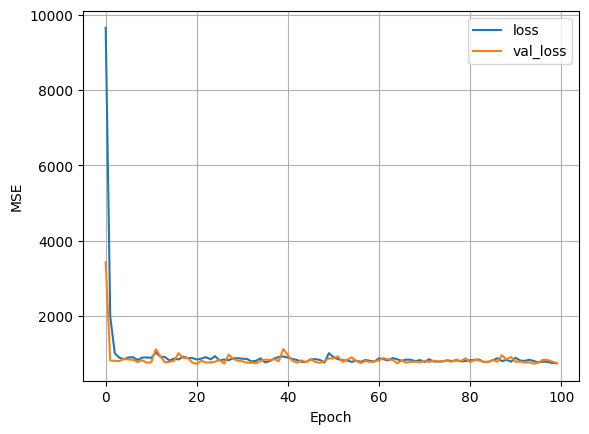

In [137]:
%%time
# Build model with best parameters
hBand_model = tuner_hBand.hypermodel.build(best_hBand)
hBand_model.summary()
plot_loss(hBand_model.fit(train_features, train_label, epochs=100, validation_split=0.2, verbose=0))

7/7 [==============================] - 0s 4ms/step


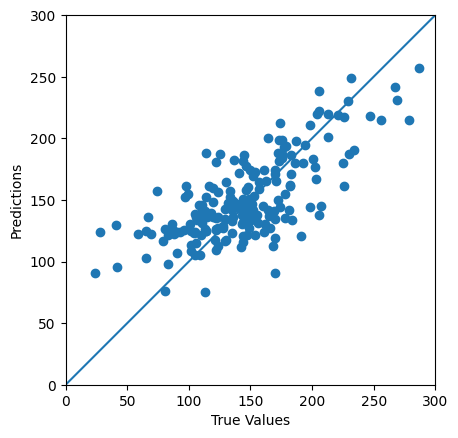

In [138]:
test_predictions = hBand_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_label, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [139]:
%%time
tuner_Bayes = kt.BayesianOptimization(
    hypermodel=build_hp_model,
    objective='val_loss',
    max_trials=10,
    num_initial_points=None,
    alpha=0.0001,
    beta=2.6,
    seed=42,
    hyperparameters=None,
    tune_new_entries=True,
    allow_new_entries=True,
    max_retries_per_trial=0,
    max_consecutive_failed_trials=3,
    overwrite=True
)

CPU times: user 62.7 ms, sys: 13 ms, total: 75.7 ms
Wall time: 76.2 ms


In [140]:
%%time
tuner_Bayes.search(train_features, train_label, epochs=50, validation_split=0.2, verbose=0,
                  callbacks=[stop_early])

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


CPU times: user 44.6 s, sys: 1.7 s, total: 46.3 s
Wall time: 50.3 s


In [141]:
#Save best hyperparameters
best_Bayes=tuner_Bayes.get_best_hyperparameters()[0]
best_Bayes.values

{'units': 8, 'activation': 'elu', 'learning_rate': 0.2}

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense_4 (Dense)             (None, 8)                 32        
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 192
Trainable params: 185
Non-trainable params: 7
________________________________________________________

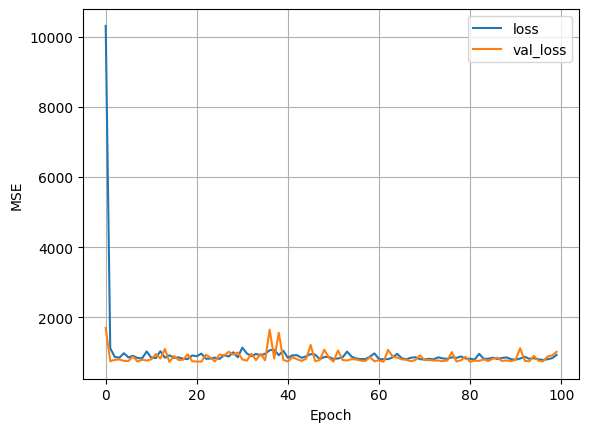

In [142]:
# Build model with best parameters
hBayes_model = tuner_Bayes.hypermodel.build(best_Bayes)
hBayes_model.summary()
plot_loss(hBayes_model.fit(train_features, train_label, epochs=100, validation_split=0.2, verbose=0))

7/7 [==============================] - 0s 2ms/step


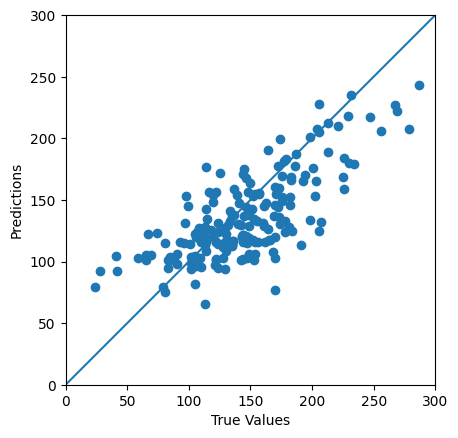

In [143]:
test_predictions = hBayes_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_label, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)